<a href="https://colab.research.google.com/github/anilsah895/skin_diseases_detection/blob/master/Skin_diseases_classifiaction021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy.ndimage
from keras.layers import Convolution2D as Conv2D
from keras.models import Input,Model

Using TensorFlow backend.


In [0]:
Base_dir="gdrive/My Drive/Colab Notebooks/Skin_Data1/"
train_path = Base_dir+"train"
validation_path = Base_dir+"validation"


In [0]:
input_shape = (150, 150, 3)

#Instantiate an empty model
model = Sequential([
Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
Conv2D(64, (3, 3), activation='relu', padding='same'),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.25),
Conv2D(128, (3, 3), activation='relu', padding='same'),
Conv2D(128, (3, 3), activation='relu', padding='same'),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.25),
Conv2D(256, (3, 3), activation='relu', padding='same'),
Conv2D(256, (3, 3), activation='relu', padding='same',),
Conv2D(256, (3, 3), activation='relu', padding='same'),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.25),
Conv2D(512, (3, 3), activation='relu', padding='same'),
Conv2D(512, (3, 3), activation='relu', padding='same'),
Conv2D(512, (3, 3), activation='relu', padding='same'),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.5),
Conv2D(512, (3, 3), activation='relu', padding='same'),
Conv2D(512, (3, 3), activation='relu', padding='same'),
Conv2D(512, (3, 3), activation='relu', padding='same'),
MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
Dropout(0.5),
Flatten(),
Dense(4096, activation='relu'),
Dense(1000, activation='relu'),
Dense(10, activation='softmax')
])

#model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
with open("FILE.text","w") as fh:
  model.summary(print_fn=lambda line: fh.write(line + "\n"))

In [0]:
""""from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))"""


'"from keras.applications import VGG16\n#Load the VGG model\nvgg_conv = VGG16(weights=\'imagenet\', include_top=False, input_shape=(128, 128, 3))'

In [0]:
import tensorflow as tf

In [0]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.75):
      print("\nReached 85.0% accuracy so cancelling training!")
      self.model.stop_training = True
      

In [0]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      #featurewise_center=True,
      #featurewise_std_normalization=True,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range = 0.2, 
      zoom_range = 0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 160
val_batchsize =40
 
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(150,150 ),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(150, 150),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 4400 images belonging to 10 classes.
Found 1100 images belonging to 10 classes.


In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4,rho=0.9, epsilon=1e-08, decay=0.00001),
              metrics=['acc'])
# Train the model
callbacks1 = myCallback()

,
                                          
#early = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=10, verbose=1, mode='auto')

history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch =train_generator.samples/train_generator.batch_size,
            epochs = 100,
            validation_steps = validation_generator.samples/validation_generator.batch_size,
            verbose = 1,
            callbacks=[callbacks1])
# Save the model
model.save('vgg16.hdf5')

Epoch 1/100
28/27 [==============================] - 79s 3s/step - loss: 2.4366 - acc: 0.1370 - val_loss: 2.2136 - val_acc: 0.1800
Epoch 2/100
28/27 [==============================] - 50s 2s/step - loss: 2.2249 - acc: 0.1699 - val_loss: 2.2044 - val_acc: 0.1845
Epoch 3/100
28/27 [==============================] - 57s 2s/step - loss: 2.2259 - acc: 0.1750 - val_loss: 2.1844 - val_acc: 0.1682
Epoch 4/100
28/27 [==============================] - 57s 2s/step - loss: 2.1469 - acc: 0.2054 - val_loss: 2.1984 - val_acc: 0.1527
Epoch 5/100
28/27 [==============================] - 56s 2s/step - loss: 2.1244 - acc: 0.2134 - val_loss: 2.0582 - val_acc: 0.2373
Epoch 6/100
28/27 [==============================] - 56s 2s/step - loss: 2.0855 - acc: 0.2239 - val_loss: 2.0924 - val_acc: 0.2227
Epoch 7/100
28/27 [==============================] - 56s 2s/step - loss: 2.1021 - acc: 0.2309 - val_loss: 2.0742 - val_acc: 0.2327
Epoch 8/100
28/27 [==============================] - 56s 2s/step - loss: 2.0439 - a

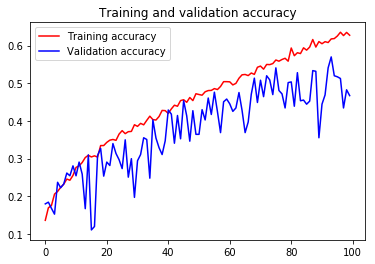

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig("TRAINING_PLOT_FILE.png", bbox_inches='tight')

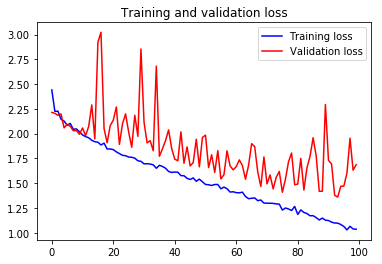

In [0]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("VALIDATION_PLOT_FILE.png", bbox_inches='tight')

In [0]:
model.save(Base_dir+'vgg16.hdf5')

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5,rho=0.9, epsilon=1e-08, decay=0.00001),
              metrics=['acc'])
# Train the model
callbacks1 = myCallback()
                                          
#early = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=10, verbose=1, mode='auto')

history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch =train_generator.samples/train_generator.batch_size,
            epochs = 100,
            validation_steps = validation_generator.samples/validation_generator.batch_size,
            verbose = 1,
            callbacks=[callbacks1])
# Save the model
model.save('01vgg16.hdf5')

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig("TRAINING_PLOT_FILE.png", bbox_inches='tight')

In [0]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("VALIDATION_PLOT_FILE.png", bbox_inches='tight')